In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Dataset

In [2]:
df = pd.read_csv('data/car details v4.csv')

In [3]:
df.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0


In [4]:
df.shape

(2059, 20)

In [5]:
df.dtypes

Make                   object
Model                  object
Price                   int64
Year                    int64
Kilometer               int64
Fuel Type              object
Transmission           object
Location               object
Color                  object
Owner                  object
Seller Type            object
Engine                 object
Max Power              object
Max Torque             object
Drivetrain             object
Length                float64
Width                 float64
Height                float64
Seating Capacity      float64
Fuel Tank Capacity    float64
dtype: object

In [6]:
df.columns

Index(['Make', 'Model', 'Price', 'Year', 'Kilometer', 'Fuel Type',
       'Transmission', 'Location', 'Color', 'Owner', 'Seller Type', 'Engine',
       'Max Power', 'Max Torque', 'Drivetrain', 'Length', 'Width', 'Height',
       'Seating Capacity', 'Fuel Tank Capacity'],
      dtype='object')

# Check and Remove Missing Values

In [7]:
df.isnull().sum().sort_values(ascending=False)

Drivetrain            136
Fuel Tank Capacity    113
Max Torque             80
Max Power              80
Engine                 80
Seating Capacity       64
Height                 64
Width                  64
Length                 64
Model                   0
Make                    0
Owner                   0
Color                   0
Location                0
Transmission            0
Fuel Type               0
Kilometer               0
Year                    0
Price                   0
Seller Type             0
dtype: int64

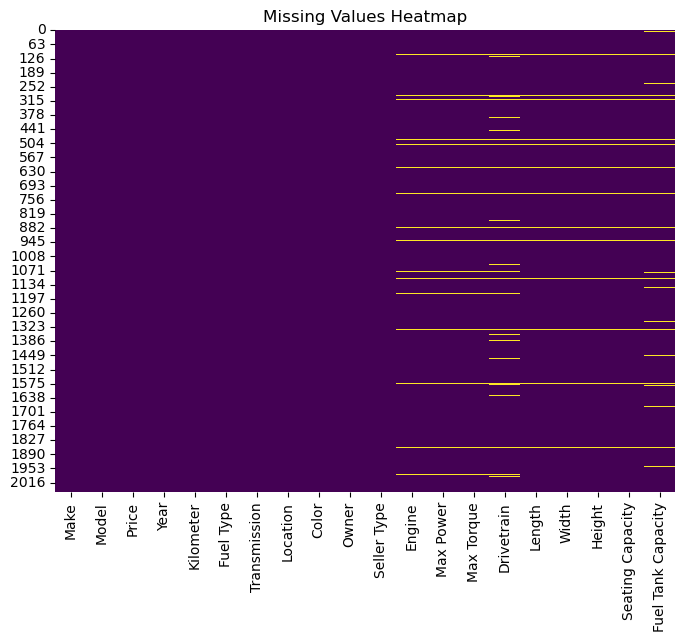

In [8]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

## Extracting Numeric Values

In [9]:
df["Engine"].unique()

array(['1198 cc', '1248 cc', '1197 cc', '2393 cc', '1373 cc', '1991 cc',
       '1995 cc', '1798 cc', '1461 cc', '999 cc', '1462 cc', '1956 cc',
       '998 cc', '796 cc', '1591 cc', '1086 cc', '1199 cc', '1582 cc',
       nan, '1047 cc', '2143 cc', '1968 cc', '1796 cc', '2498 cc',
       '2494 cc', '2179 cc', '1998 cc', '1497 cc', '1196 cc', '2755 cc',
       '1799 cc', '1493 cc', '1399 cc', '1498 cc', '1997 cc', '1598 cc',
       '2993 cc', '2995 cc', '2982 cc', '1353 cc', '1984 cc', '2967 cc',
       '2609 cc', '1950 cc', '1999 cc', '4663 cc', '1451 cc', '2354 cc',
       '1396 cc', '2987 cc', '2997 cc', '1336 cc', '4163 cc', '3496 cc',
       '799 cc', '2979 cc', '4806 cc', '2996 cc', '1061 cc', '2184 cc',
       '2497 cc', '2999 cc', '1948 cc', '3436 cc', '2925 cc', '2489 cc',
       '1368 cc', '1797 cc', '1298 cc', '2694 cc', '1186 cc', '1364 cc',
       '3498 cc', '3982 cc', '1120 cc', '2523 cc', '1988 cc', '3902 cc',
       '624 cc', '2477 cc', '3198 cc', '5204 cc', '814 cc', '

In [10]:
df["Engine"] = pd.to_numeric(df['Engine'].str.extract(r'([\d\.]+)')[0], errors='coerce')
df["Engine"].head(10)

0    1198.0
1    1248.0
2    1197.0
3    1197.0
4    2393.0
5    1373.0
6    1991.0
7    1995.0
8    1798.0
9    1461.0
Name: Engine, dtype: float64

In [11]:
df["Max Power"].unique()

array(['87 bhp @ 6000 rpm', '74 bhp @ 4000 rpm', '79 bhp @ 6000 rpm',
       '82 bhp @ 6000 rpm', '148 bhp @ 3400 rpm', '91 bhp @ 6000 rpm',
       '181 bhp @ 5500 rpm', '188 bhp @ 4000 rpm', '177 bhp @ 5100 rpm',
       '84 bhp @ 3750 rpm', '67 bhp @ 5500 rpm', '103 bhp @ 6000 rpm',
       '138 bhp @ 3750 rpm', '103 bhp @ 5000 rpm', '67 bhp @ 6000 rpm',
       '47 bhp @ 6000 rpm', '122 bhp @ 6400 rpm', '68 bhp @ 5500 rpm',
       '118 bhp @ 6000 rpm', '58 bhp @ 6000 rpm', '85 bhp @ 6000 rpm',
       '89 bhp @ 6000 rpm', '126 bhp @ 4000 rpm', '124 bhp @ 6000 rpm',
       nan, '62 bhp @ 5500 rpm', '84 bhp @ 6000 rpm', '69 bhp @ 4000 rpm',
       '168 bhp @ 3000 rpm', '203 bhp @ 4200 rpm', '138 bhp @ 6400 rpm',
       '177 bhp @ 4200 rpm', '165@5500', '105 bhp @ 3800 rpm',
       '83 bhp @ 6000 rpm', '89 bhp @ 4000 rpm', '169 bhp @ 3750 rpm',
       '101 bhp @ 3600 rpm', '190 bhp @ 4000 rpm', '171 bhp @ 3750 rpm',
       '120 bhp @ 4000 rpm', '181 bhp @ 5000 rpm', '117 bhp @ 6600 rpm',
 

In [12]:
df["Max Power bhp"] = pd.to_numeric(df['Max Power'].str.extract(r'([\d\.]+)')[0], errors='coerce')
df["Max Power bhp"].head(10)

0     87.0
1     74.0
2     79.0
3     82.0
4    148.0
5     91.0
6    181.0
7    188.0
8    177.0
9     84.0
Name: Max Power bhp, dtype: float64

In [13]:
df["Max Torque"].unique()

array(['109 Nm @ 4500 rpm', '190 Nm @ 2000 rpm', '112.7619 Nm @ 4000 rpm',
       '113 Nm @ 4200 rpm', '343 Nm @ 1400 rpm', '130 Nm @ 4000 rpm',
       '300 Nm @ 1200 rpm', '400 Nm @ 1750 rpm', '250 Nm @ 1250 rpm',
       '200 Nm @ 1900 rpm', '115 Nm @ 4000 rpm', '91 Nm @ 4250 rpm',
       '138 Nm @ 4400 rpm', '350 Nm @ 1750 rpm', '175 Nm @ 1500 rpm',
       '90 Nm @ 3500 rpm', '69 Nm @ 3500 rpm', '154 Nm @ 4850 rpm',
       '153 Nm @ 3800 rpm', '99 Nm @ 4500 rpm', '172 Nm @ 1500 rpm',
       '78 Nm @ 3500 rpm', '113 Nm @ 4500 rpm', '110 Nm @ 4800 rpm',
       '265 Nm @ 1900 rpm', '170 Nm @ 1400 rpm', nan, '96 Nm @ 3000 rpm',
       '114 Nm @ 3500 rpm', '140 Nm @ 1800 rpm', '400 Nm @ 1400 rpm',
       '260 Nm @ 1500 rpm', '500 Nm @ 1600 rpm', '173 Nm @ 4000 rpm',
       '380 Nm @ 1750 rpm', '240@3000', '247 Nm @ 1800 rpm',
       '200 Nm @ 1750 rpm', '200 Nm @ 1200 rpm', '290 Nm @ 1800 rpm',
       '270 Nm @ 1350 rpm', '145 Nm @ 4600 rpm', '180 Nm @ 2000 rpm',
       '101 Nm @ 3000 rpm

In [14]:
df["Max Torque Nm"] = pd.to_numeric(df['Max Torque'].str.extract(r'([\d\.]+)')[0], errors='coerce')
df["Max Torque Nm"].head(10)

0    109.0000
1    190.0000
2    112.7619
3    113.0000
4    343.0000
5    130.0000
6    300.0000
7    400.0000
8    250.0000
9    200.0000
Name: Max Torque Nm, dtype: float64

Handle missing values by imputing numerical columns with the median and categorical columns with the mode, as this approach is robust to outliers and maintains the distribution of the data.

In [15]:
for col in ['Engine', 'Max Power bhp', 'Max Torque Nm', 'Length', 'Width', 'Height', 
            'Seating Capacity', 'Fuel Tank Capacity', 'Drivetrain']:
    if df[col].dtype in ['int64', 'float64']:
        df.fillna({col: df[col].median()}, inplace=True)
    else:
        df.fillna({col: df[col].mode()[0]}, inplace=True)

In [16]:
df.drop(columns=["Max Power", "Max Torque"], inplace=True)

# Check Duplicates

In [17]:
df.duplicated().sum()

0

# Removing Irrelevant Columns

In [18]:
# Model is dropped because Model is dependent on Make
# Color is dropped because is doesn't really affect the resale price

df.drop(columns=["Model", "Color"], inplace=True)

In [19]:
df.shape

(2059, 18)

## Outlier Removal

In [20]:
df.describe()

,Price,Year,Kilometer,Engine,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,Max Power bhp,Max Torque Nm
count,2.059000e+03,2059.000000,2.059000e+03,2059.000000,2059.000000,2059.000000,2059.000000,2059.000000,2059.000000,2059.000000,2059.000000
mean,1.702992e+06,2016.425449,5.422471e+04,1685.015542,4283.631374,1768.054395,1590.282661,5.296746,51.892326,129.082904,244.069532
std,2.419881e+06,3.363564,5.736172e+04,632.220086,435.799127,133.146412,134.186875,0.811029,14.696588,63.850696,137.993430
min,4.900000e+04,1988.000000,0.000000e+00,624.000000,3099.000000,1475.000000,1165.000000,2.000000,15.000000,35.000000,48.000000
25%,4.849990e+05,2014.000000,2.900000e+04,1198.000000,3986.000000,1695.000000,1485.000000,5.000000,42.000000,83.000000,115.000000
50%,8.250000e+05,2017.000000,5.000000e+04,1498.000000,4370.000000,1770.000000,1545.000000,5.000000,50.000000,116.000000,200.000000
75%,1.925000e+06,2019.000000,7.200000e+04,1995.000000,4620.000000,1831.000000,1672.000000,5.000000,60.000000,169.000000,343.000000
max,3.500000e+07,2022.000000,2.000000e+06,6592.000000,5569.000000,2220.000000,1995.000000,8.000000,105.000000,660.000000,780.000000


In [21]:
df.dtypes

Make                   object
Price                   int64
Year                    int64
Kilometer               int64
Fuel Type              object
Transmission           object
Location               object
Owner                  object
Seller Type            object
Engine                float64
Drivetrain             object
Length                float64
Width                 float64
Height                float64
Seating Capacity      float64
Fuel Tank Capacity    float64
Max Power bhp         float64
Max Torque Nm         float64
dtype: object

In [22]:
numeric_cols = df.select_dtypes(include='number').columns

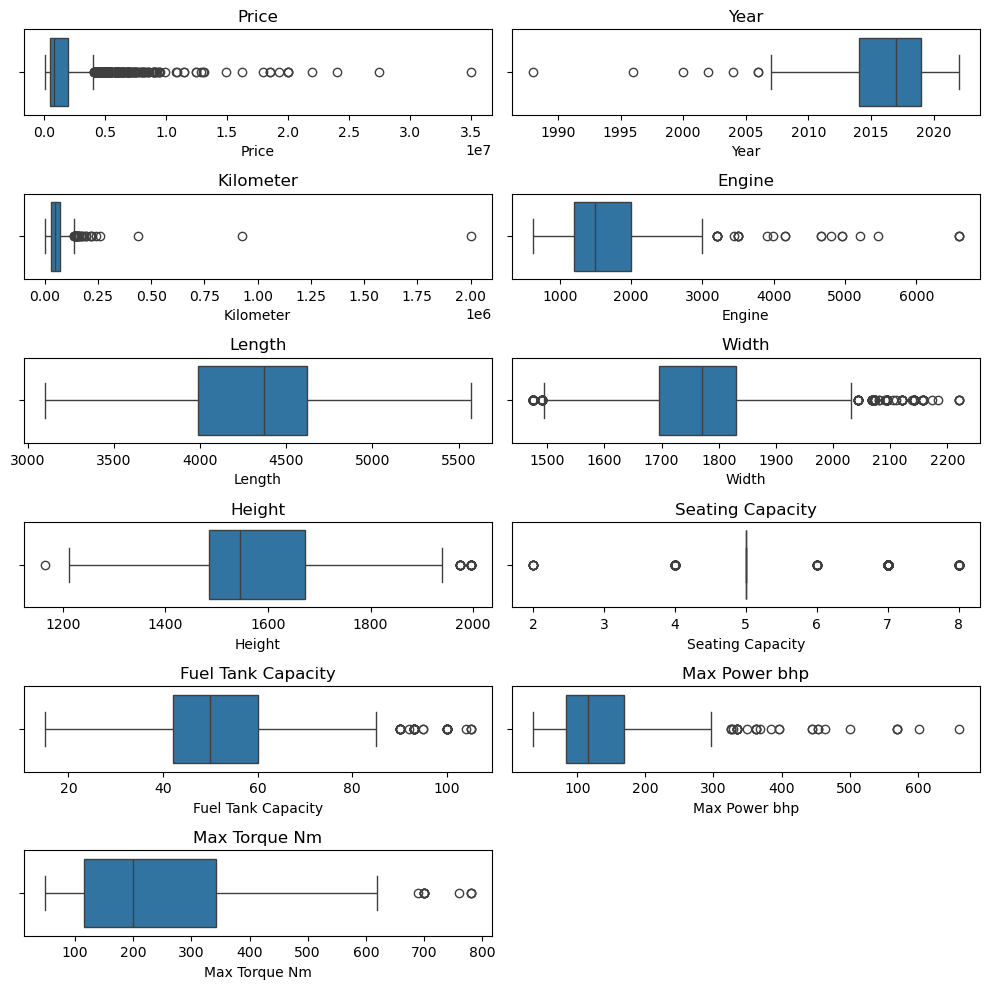

In [23]:
plt.figure(figsize=(10, 10))

for i, col in enumerate(numeric_cols):
    plt.subplot(6, 2, i+1)
    sns.boxplot(df, x=col)
    plt.title(col)
    plt.tight_layout()
plt.show()

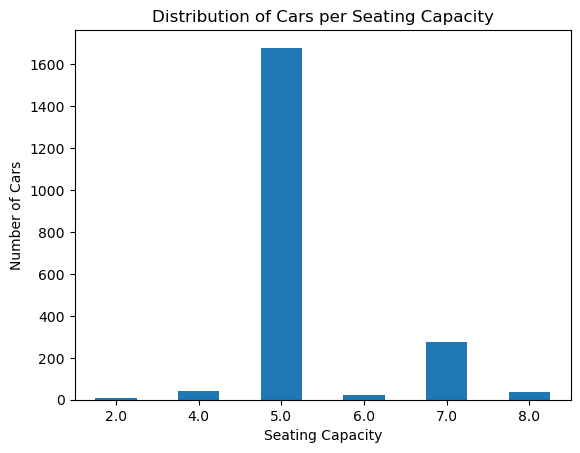

In [24]:
df["Seating Capacity"].value_counts().sort_index().plot(
    kind="bar",
    title="Distribution of Cars per Seating Capacity",
    ylabel="Number of Cars"
)
plt.xticks(rotation=0)
plt.show()

Remove gross outliers

In [25]:
for col in ["Price", "Year", "Kilometer", "Engine", "Max Power bhp"]:
    Q1, Q3 = df[col].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    df = df[df[col].between(Q1 - 3 * IQR, Q3 + 3 * IQR, inclusive="both")]

In [26]:
df = df[df["Seating Capacity"] > 2]

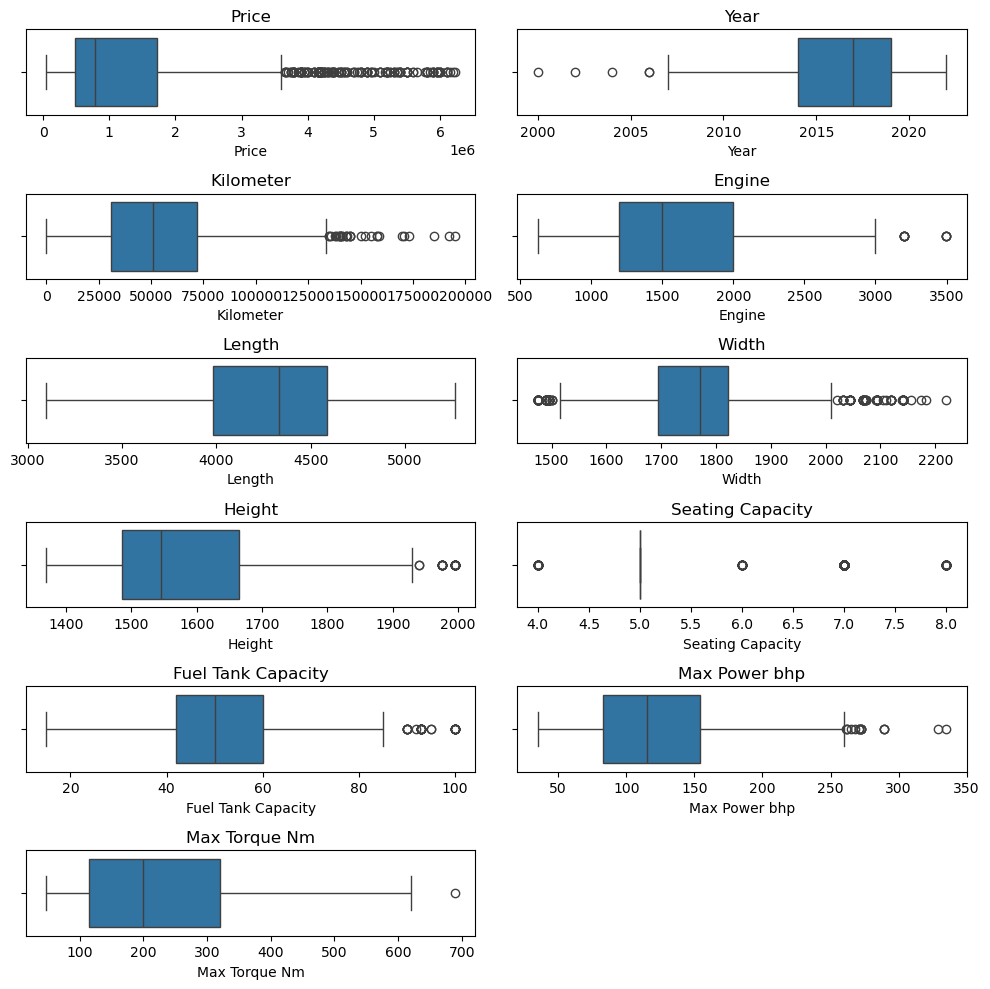

In [27]:
plt.figure(figsize=(10, 10))

for i, col in enumerate(numeric_cols):
    plt.subplot(6, 2, i+1)
    sns.boxplot(df, x=col)
    plt.title(col)
    plt.tight_layout()
plt.show()

In [28]:
df.shape

(1958, 18)

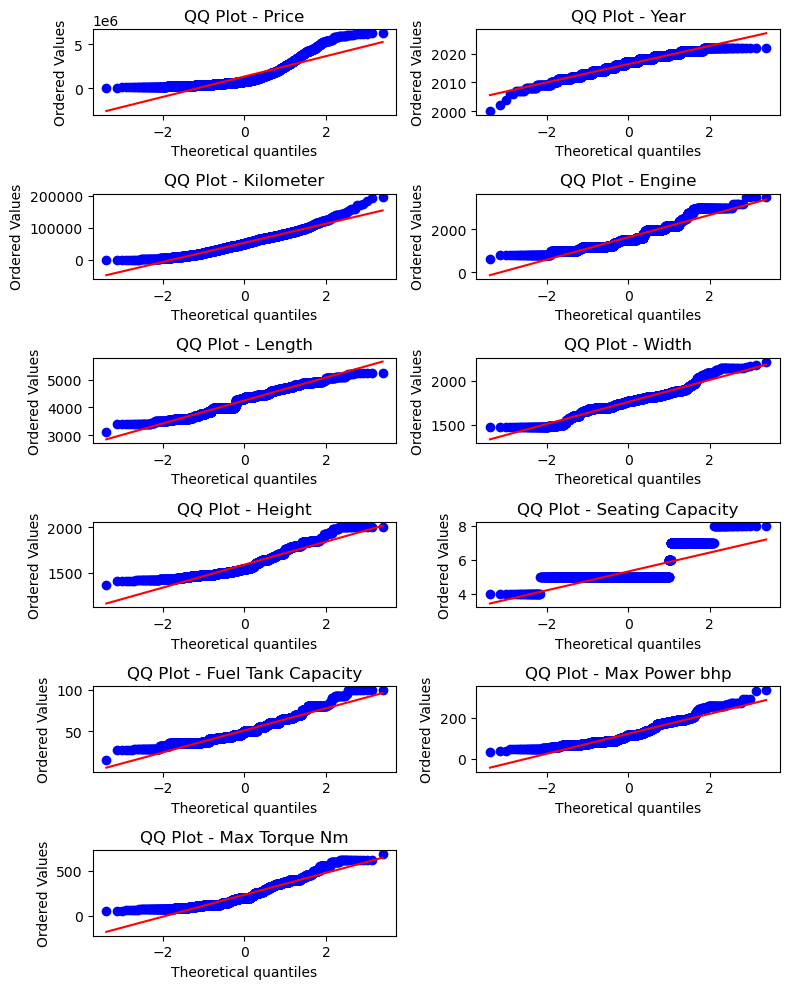

In [29]:
plt.figure(figsize=(8, 10))

for i, col in enumerate(numeric_cols):
    plt.subplot(6, 2, i+1)
    stats.probplot(df[col], dist="norm", plot=plt)
    plt.title(f"QQ Plot - {col}")
    plt.tight_layout()

plt.show()

In [30]:
skewness = df[numeric_cols].skew()
kurtosis = df[numeric_cols].kurtosis()

# Combine into one DataFrame
stats_df = pd.concat([skewness, kurtosis], axis=1)
stats_df.columns = ["Skewness", "Kurtosis"]
stats_df["Skew Category"] = pd.cut(
    stats_df["Skewness"],
    bins=[-np.inf, -1, -0.5, 0.5, 1, np.inf],
    labels=["Left-Skewed", "Slight Left", "Symmetric", "Slight Right", "Right-Skewed"]
)
stats_df["Has Heavy Tails"] = stats_df["Kurtosis"] > 3

stats_df

,Skewness,Kurtosis,Skew Category,Has Heavy Tails
Price,1.741565,2.479069,Right-Skewed,False
Year,-0.503045,0.194229,Slight Left,False
Kilometer,0.674154,0.829899,Slight Right,False
Engine,0.944012,0.388159,Slight Right,False
Length,-0.076017,-0.843344,Symmetric,False
Width,0.254436,1.128421,Symmetric,False
Height,0.993521,0.237531,Slight Right,False
Seating Capacity,1.923667,2.480314,Right-Skewed,False
Fuel Tank Capacity,0.897222,0.652687,Slight Right,False
Max Power bhp,0.924976,0.415072,Slight Right,False


Transforming Skewed Features

In [31]:
from sklearn.preprocessing import PowerTransformer
import joblib

skewed_features = ["Price", "Height"]

pt_height = PowerTransformer(method="yeo-johnson", standardize=True)
df[f"Height_yj"] = pt_height.fit_transform(df[["Height"]])

pt_target = PowerTransformer(method="yeo-johnson", standardize=True)
df["Price_yj"] = pt_target.fit_transform(df[["Price"]])
joblib.dump(pt_target, 'artifacts/price_yj_scaler.pkl')

['artifacts/price_yj_scaler.pkl']

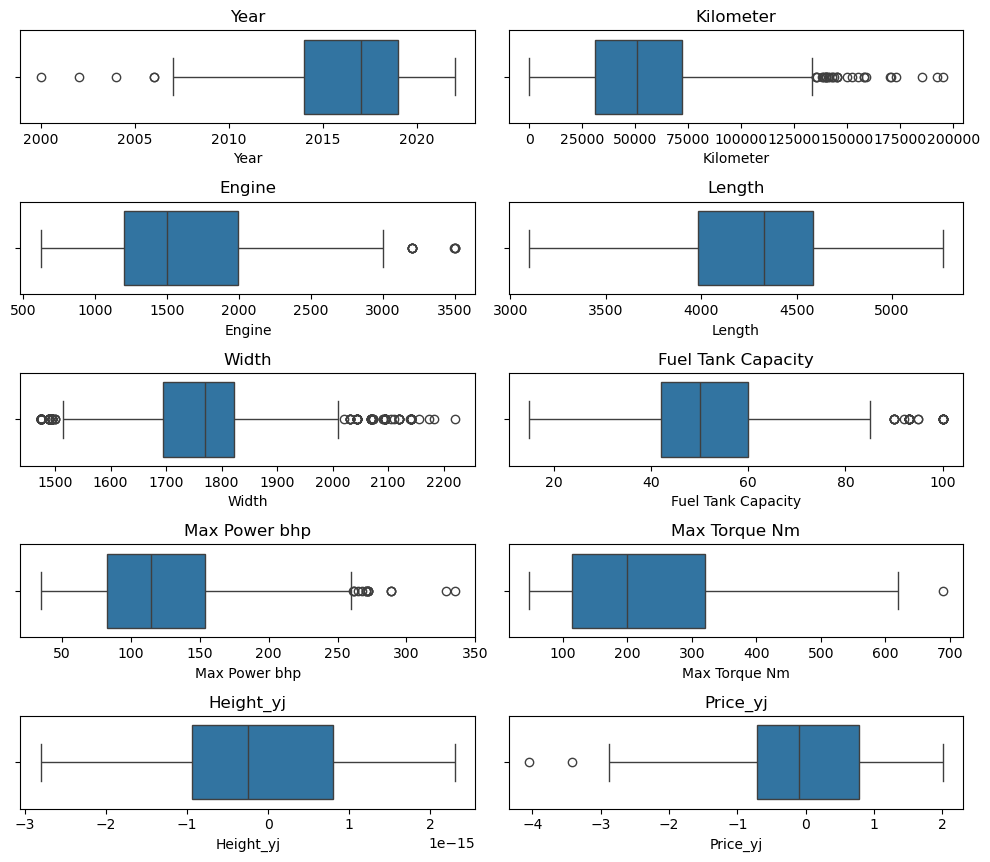

In [32]:
new_numeric_cols = df.select_dtypes(include='number').columns
new_numeric_cols = numeric_cols[~numeric_cols.isin(['Seating Capacity', 'Height', 'Price'])].to_list()
new_numeric_cols.append("Height_yj")
new_numeric_cols.append("Price_yj")

plt.figure(figsize=(10, 10))

for i, col in enumerate(new_numeric_cols):
    plt.subplot(6, 2, i+1)
    sns.boxplot(df, x=col)
    plt.title(col)
    plt.tight_layout()
    
plt.show()

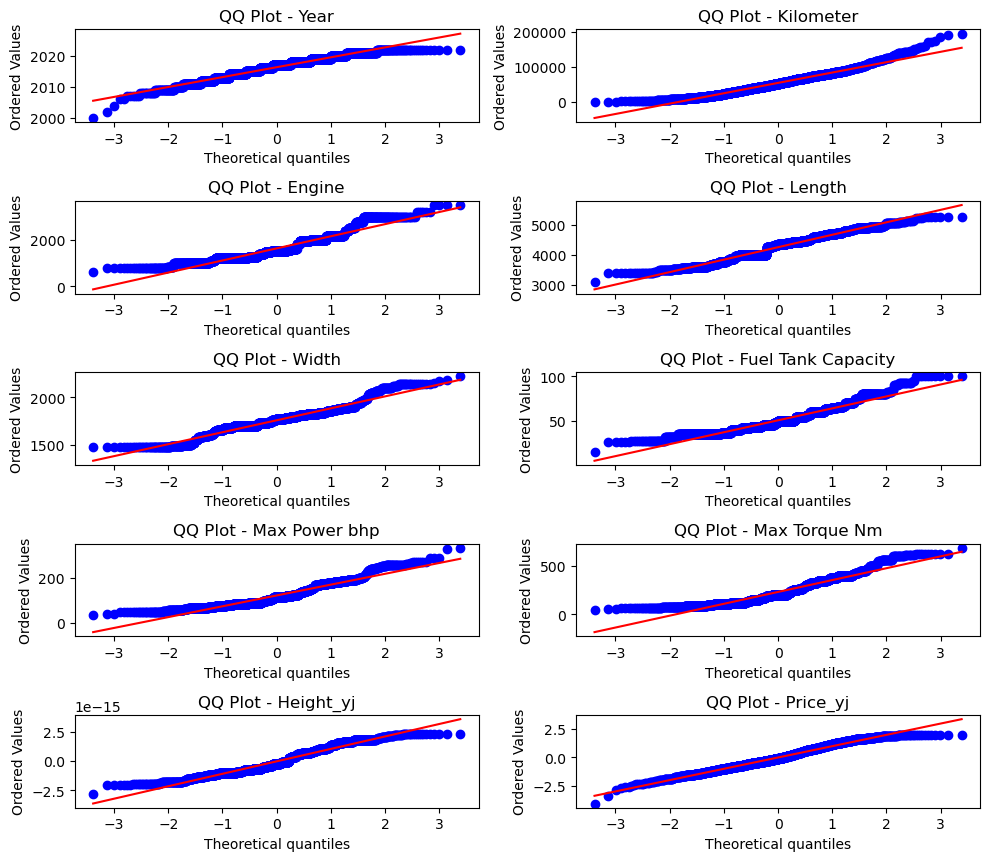

In [33]:
plt.figure(figsize=(10, 10))

for i, col in enumerate(new_numeric_cols):
    plt.subplot(6, 2, i+1)
    stats.probplot(df[col], dist="norm", plot=plt)
    plt.title(f"QQ Plot - {col}")
    plt.tight_layout()

plt.show()

Remove outliers

In [34]:
def remove_outliers(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        bounds = (Q1 - 1.5 * (Q3 - Q1), Q3 + 1.5 * (Q3 - Q1))
        df = df[df[col].between(bounds[0], bounds[1], inclusive="both")]
    return df

In [35]:
df = remove_outliers(df, cols=new_numeric_cols)

In [36]:
df.shape

(1655, 20)

# Replacing infrequent values

In [37]:
df['Location'].unique()

array(['Pune', 'Ludhiana', 'Lucknow', 'Mangalore', 'Mumbai', 'Coimbatore',
       'Bangalore', 'Delhi', 'Raipur', 'Kanpur', 'Patna', 'Hyderabad',
       'Yamunanagar', 'Gurgaon', 'Vadodara', 'Jaipur', 'Agra', 'Goa',
       'Warangal', 'Jalandhar', 'Noida', 'Ahmedabad', 'Mohali',
       'Ghaziabad', 'Kolkata', 'Zirakpur', 'Nagpur', 'Thane', 'Ranchi',
       'Amritsar', 'Chennai', 'Navi Mumbai', 'Udupi', 'Panvel',
       'Jamshedpur', 'Aurangabad', 'Faridabad', 'Rudrapur', 'Varanasi',
       'Salem', 'Dehradun', 'Chandigarh', 'Valsad', 'Haldwani', 'Surat',
       'Karnal', 'Panchkula', 'Mysore', 'Rohtak', 'Ambala Cantt',
       'Samastipur', 'Nashik', 'Bhubaneswar', 'Kheda', 'Meerut',
       'Ernakulam', 'Kharar', 'Bhopal', 'Dharwad', 'Gorakhpur',
       'Guwahati', 'Allahabad', 'Mirzapur', 'Muzaffurpur', 'Purnea',
       'Indore', 'Unnao', 'Kollam', 'Kota', 'Dak. Kannada', 'Ranga Reddy',
       'Bulandshahar', 'Roorkee', 'Siliguri'], dtype=object)

In [38]:
location_counts = df['Location'].value_counts()
location_counts

Location
Mumbai        285
Delhi         240
Pune          110
Bangalore     109
Hyderabad      94
             ... 
Unnao           1
Purnea          1
Valsad          1
Samastipur      1
Siliguri        1
Name: count, Length: 74, dtype: int64

In [39]:
location_counts[location_counts < 5].sum()

86

In [40]:
locations_to_replace = location_counts[location_counts < 5].index
locations_to_replace, locations_to_replace.size

(Index(['Bhubaneswar', 'Panchkula', 'Amritsar', 'Indore', 'Goa', 'Yamunanagar',
        'Bhopal', 'Roorkee', 'Allahabad', 'Rudrapur', 'Ghaziabad', 'Salem',
        'Aurangabad', 'Panvel', 'Vadodara', 'Bulandshahar', 'Kheda',
        'Ernakulam', 'Kharar', 'Kota', 'Dharwad', 'Gorakhpur', 'Nagpur',
        'Haldwani', 'Mirzapur', 'Muzaffurpur', 'Ranga Reddy', 'Warangal',
        'Dak. Kannada', 'Rohtak', 'Kollam', 'Unnao', 'Purnea', 'Valsad',
        'Samastipur', 'Siliguri'],
       dtype='object', name='Location'),
 36)

In [41]:
df['Location'] = df['Location'].replace(locations_to_replace, 'Other')

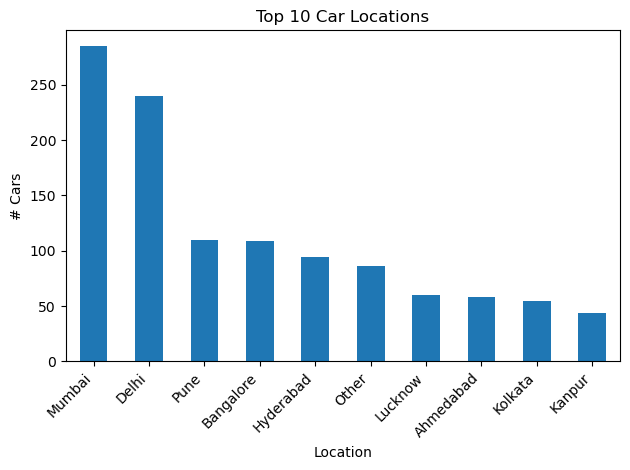

In [42]:
df['Location'].value_counts().head(10).plot(
    kind="bar",
    ylabel="# Cars",
    title= "Top 10 Car Locations"
)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [43]:
df['Make'].unique()

array(['Honda', 'Maruti Suzuki', 'Hyundai', 'Toyota', 'Mercedes-Benz',
       'BMW', 'Skoda', 'Nissan', 'Renault', 'Tata', 'Volkswagen', 'Ford',
       'Audi', 'Mahindra', 'MG', 'Jeep', 'Kia', 'Volvo', 'Isuzu',
       'Jaguar', 'Land Rover', 'Porsche', 'Fiat', 'MINI', 'Mitsubishi',
       'Datsun', 'Chevrolet', 'Ssangyong', 'Lexus'], dtype=object)

In [44]:
make_counts = df['Make'].value_counts()

In [45]:
make_counts[make_counts < 5].sum()

17

In [46]:
makes_to_replace = make_counts[make_counts < 5].index
makes_to_replace, makes_to_replace.size

(Index(['Land Rover', 'Porsche', 'Mitsubishi', 'Ssangyong', 'Isuzu', 'Fiat'], dtype='object', name='Make'),
 6)

In [47]:
df['Make'] = df['Make'].replace(makes_to_replace, 'Other')

In [48]:
df['Make'].value_counts()

Make
Hyundai          339
Maruti Suzuki    326
Honda            154
Toyota           120
Mahindra         112
Audi             101
Mercedes-Benz     89
Tata              53
Volkswagen        50
BMW               46
Renault           42
Skoda             40
Ford              40
Kia               23
Other             17
Jeep              17
MG                17
Nissan            16
Volvo             15
MINI              11
Datsun             8
Jaguar             7
Chevrolet          6
Lexus              6
Name: count, dtype: int64

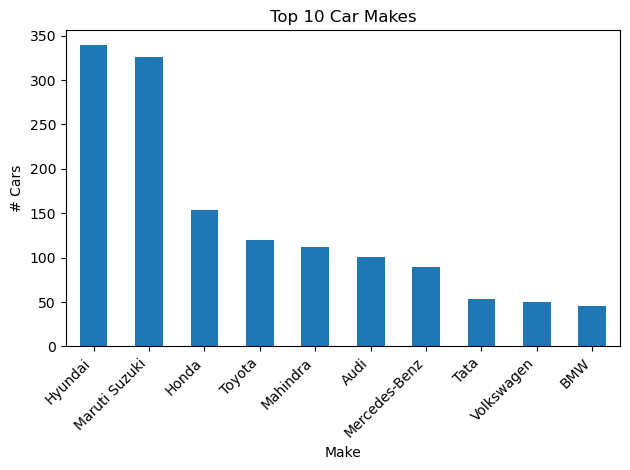

In [49]:
df['Make'].value_counts().head(10).plot(
    kind="bar",
    ylabel="# Cars",
    title= "Top 10 Car Makes"
)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [50]:
df['Fuel Type'].value_counts()

Fuel Type
Diesel          829
Petrol          796
CNG              19
Electric          7
Hybrid            2
LPG               1
Petrol + CNG      1
Name: count, dtype: int64

In [51]:
df['Fuel Type'] = df['Fuel Type'].apply(
    lambda x: x if x in ["Diesel", "Petrol"] else "Other"
)

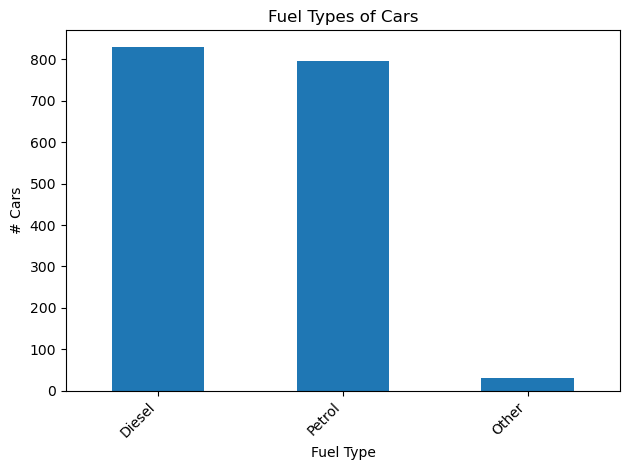

In [52]:
df['Fuel Type'].value_counts().plot(
    kind="bar",
    ylabel="# Cars",
    title= "Fuel Types of Cars"
)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# Save data and items

In [53]:
df.to_csv('artifacts/cleaned_car_details.csv', index=False)